In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy
import pickle
import pandas as pd

import sys,os,importlib,pdb
sys.path.append('/mnt/home/szheng/projects/util_code')
import gm

import scipy
from scipy.signal import find_peaks
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
from importlib import reload

import copy

%matplotlib inline
import gm_glm_bayesian as glm
import gm_glm_bayesian_helper as glmh
import math_functions as mf
import plot_mcmc as pmc
reload(pmc)

import gm_cv as gc
import glm_cv as glmc

In [7]:
sess_name="e15_13f1_220117"
py_data_dir = "/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data"
fr_ = pickle.load(open(os.path.join(py_data_dir,'fr.p'),'rb'))
pos_bins = fr_['pos_bins']['lin']
bin_to_lin=numpy.concatenate([pos_bins[:-1,None],pos_bins[1:,None]],axis=1).mean(axis=1)

fr = fr_['df']['pyr']
fr_map_ = pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))
fr_map_trial=fr_map_['fr_map_trial']
fr_map_avg = fr_map_['fr_map']
cell_cols = fr_['cell_cols']

In [21]:
fr_map_trial[tt].swapaxes(0,2).reshape(ntrials,-1)[0]

array([0.9297605 , 3.79228406, 0.46488025, ..., 0.        , 0.        ,
       0.        ])

In [34]:
fr_map_axes_swapped_reshaped[1]

array([ 8.00634896,  8.8901106 , 10.32683855, ...,  1.11167561,
        1.37975079,  1.54172532])

In [35]:
fr_map_trial[0][:,:,1][0]

array([ 8.00634896,  8.8901106 , 10.32683855, 11.94711688, 13.49265196,
       14.78346321, 15.66817357, 16.04035812, 15.88882232, 15.3116774 ,
       14.47022936, 13.54857878, 12.71291913, 11.99131999, 11.17245382,
        9.93097441,  8.11063758,  5.89290456,  3.71235909,  1.98675001,
        0.89295558,  0.34039471,  0.1329705 ,  0.11485869,  0.22109492,
        0.4540819 ,  0.84557551,  1.42548629,  2.17180988,  2.94570364,
        3.4849027 ,  3.55653141,  3.14217632,  2.42586624,  1.65462312,
        1.02912694,  0.65369296,  0.55758601,  0.76199719,  1.32301543,
        2.30571115,  3.68331327,  5.22925159,  6.52602182,  7.13443242,
        6.83761125,  5.81119306,  4.48451601,  3.2121139 ,  2.15641076,
        1.36464372,  0.84220721,  0.57365485,  0.51319025,  0.58587317,
        0.7222914 ,  0.89383999,  1.11862356,  1.44008814,  1.87169953,
        2.33021794,  2.65183845,  2.72534736,  2.60187745,  2.45488212,
        2.45506694,  2.7002076 ,  3.20509064,  3.87627596,  4.50

In [117]:
def get_pop_concat_corr_by_trial(fr_map_one_trial,fig=None,ax=None):
    '''
    fr_map_one_trial: nneurons x npos x ntrials
    '''
    ntrials = fr_map_one_trial.shape[-1]
    fr_map_axes_swapped_reshaped=fr_map_one_trial.swapaxes(0,2).swapaxes(1,2).reshape(ntrials,-1)
    corr = np.corrcoef(fr_map_axes_swapped_reshaped)
    if ax is None:
        fig,ax=plt.subplots()
    ax.imshow(corr,aspect=1)

    return corr, fig, ax


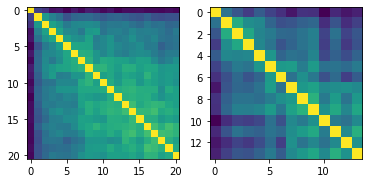

In [48]:
fig,axs= plt.subplots(1,2)
for tt in [0,1]:
    corr,fig,ax=get_pop_concat_corr_by_trial(fr_map_trial[tt],ax=axs[tt])

In [55]:
fmz=scipy.stats.zscore(fr_map_trial[0],axis=(1))

In [138]:
def zscore_fr_map_onetrial(fr_map_onetrial):
    diff = (fr_map_onetrial - fr_map_onetrial.mean(axis=(1,2),keepdims=True))
    std = fr_map_onetrial.std(axis=(1,2),keepdims=True)
    
    z=np.divide(diff,std,out=np.full_like(diff,np.nan),where=std!=0,)
    to_exclude=np.unique(np.nonzero(np.isnan(z))[0])
    mask = np.ones(z.shape[0],dtype=bool)
    mask[to_exclude]=0
    z_ma = z[mask]
    return z_ma

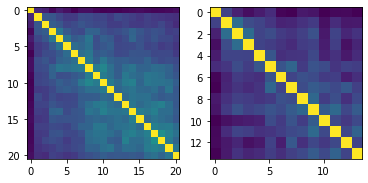

In [139]:
fig,axs= plt.subplots(1,2)
for tt in [0,1]:
    z_ma = zscore_fr_map_onetrial(fr_map_trial[tt])
    corr,fig,ax=get_pop_concat_corr_by_trial(z_ma,fig=fig,ax=axs[tt])